<a href="https://colab.research.google.com/github/saadchamdatascience-lab/Retail-Sales-Analysis/blob/main/Retail_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# loading store dataset
import pandas as pd
df_store = pd.read_csv("/content/drive/MyDrive/Amaan-Retail Project/DataSets/stores_data_set.csv")
df_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [11]:
df_store.isnull().sum()

,0
Store,0
Type,0
Size,0


In [12]:
# loading sales dataset
df_sales = pd.read_csv("/content/drive/MyDrive/Amaan-Retail Project/DataSets/sales_data_set.csv")
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [13]:
df_sales.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


In [ ]:
# loading features dataset
df_feature = pd.read_csv("/content/drive/MyDrive/Amaan-Retail Project/DataSets/Features_data_set.csv")
df_feature

In [15]:
df_feature.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [16]:
# combining store and sales dataframe into single dataframe based on 'store' column
df1 = pd.merge(df_sales, df_store, on='Store', how='inner')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [17]:
# combining store and feature dataframe into single datarame based on 'store' column
df2 = pd.merge(df_store, df_feature, on='Store', how='inner')
df2

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [18]:
# creating unique column (diff) for the combination of store and date
df1['diff'] = df1['Store'].astype(str) + '-' + df1['Date']
df2['diff'] = df2['Store'].astype(str) + '-' + df2['Date']

In [19]:
df1.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff
421565,45,98,28/09/2012,508.37,False,B,118221,45-28/09/2012
421566,45,98,05/10/2012,628.10,False,B,118221,45-05/10/2012
421567,45,98,12/10/2012,1061.02,False,B,118221,45-12/10/2012
421568,45,98,19/10/2012,760.01,False,B,118221,45-19/10/2012
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012


In [20]:
df2.tail(3)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
8189,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [21]:
# df1 have 2010 to 2012-oct data
# df2 have 2010 to 2013 data
# so we need to split (2010 to 2012-oct data) and (2012-nov to 2013 data) from df2
# and (2010 to 2012-oct data) add to df1

In [22]:
# make list with diff column for df1
df1_list = df1['diff'].to_list()

In [23]:
# filter 2010 to 2012-oct data from df2 based on df1_list
df2_inlist = df2[df2['diff'].isin(df1_list)]
df2_inlist.reset_index(drop=True, inplace=True)
df2_inlist.tail(5)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
6430,45,B,118221,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,45-28/09/2012
6431,45,B,118221,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,45-05/10/2012
6432,45,B,118221,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,45-12/10/2012
6433,45,B,118221,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,45-19/10/2012
6434,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,45-26/10/2012


In [24]:
# anther filter for 2012-oct to 2013 data from df2 not in df1_list (~)
df2_notinlist = df2[~df2['diff'].isin(df1_list)]
df2_notinlist.reset_index(drop=True, inplace=True)
df2_notinlist.tail(5)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
1750,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
1751,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
1752,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
1753,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
1754,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [25]:
# 2010 to 2013     = 8190 (total)
# 2010 to 2012-oct = 6435
# 2012-nov to 2013 = 1755

df2.shape, df2_inlist.shape, df2_notinlist.shape

((8190, 15), (6435, 15), (1755, 15))

In [26]:
# check unique columns
df2['diff'].nunique(), df2_inlist['diff'].nunique(), df2_notinlist['diff'].nunique()

(8190, 6435, 1755)

In [27]:
# merge df1 and df2(2010 to 2012-oct) data based on 'diff' column
# 'inner' - merge columns based on exact 'diff' in both dataframes

df3 = pd.merge(df1, df2_inlist, on='diff', how='inner')
df3.tail()

,Store_x,Dept,Date_x,Weekly_Sales,IsHoliday_x,Type_x,Size_x,diff,Store_y,Type_y,Size_y,Date_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,98,28/09/2012,508.37,False,B,118221,45-28/09/2012,45,B,118221,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,05/10/2012,628.10,False,B,118221,45-05/10/2012,45,B,118221,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,12/10/2012,1061.02,False,B,118221,45-12/10/2012,45,B,118221,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,19/10/2012,760.01,False,B,118221,45-19/10/2012,45,B,118221,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False


In [28]:
# drop the duplicate columns and rename it
df3.drop(columns=['Store_y','Type_y','Size_y','Date_y','IsHoliday_y'], inplace=True)
df3.rename(columns={'Store_x':'Store', 'Date_x':'Date', 'IsHoliday_x':'IsHoliday', 'Type_x':'Type', 'Size_x':'Size'}, inplace=True)

In [29]:
df3.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421567,45,98,12/10/2012,1061.02,False,B,118221,45-12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,19/10/2012,760.01,False,B,118221,45-19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


In [30]:
# 2012-nov to 2013 dataframe
df2_notinlist.tail(3)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
1752,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
1753,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
1754,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [31]:
# df1 (2010 to 2012-oct)           - 'Store', 'Date', 'Dept'
# df2_notinlist (2012-nov to 2013) - 'Store', 'Date'         - 'Dept' is missing

# so we need make df2_notinlist into 'Dept' wise data

In [32]:
# filter 'store' and 'dept' column from sales dataframe
s = df_sales[['Store','Dept']]
s

,Store,Dept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
421565,45,98
421566,45,98
421567,45,98
421568,45,98


In [33]:
# remove duplicates from the combination of 'store' and 'dept'

s.drop_duplicates(subset=['Store', 'Dept'], inplace=True)
s.reset_index(drop=True, inplace=True)
s

,Store,Dept
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3326,45,94
3327,45,95
3328,45,96
3329,45,97


In [34]:
# make dataframe of 's' and 'df2_notinlist (2012-nov to 2013)' based on 'store' column
# outer - it create rows for all combinations like (store,dept,date,etc.,)

df4 = pd.merge(s, df2_notinlist, on='Store', how='outer')
df4.tail()

,Store,Dept,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
129904,45,98,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
129905,45,98,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
129906,45,98,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
129907,45,98,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
129908,45,98,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [35]:
# concatinate both dataframes into single dataframe (2010 to 2013)

df5 = pd.concat([df3, df4])
df5.reset_index(drop=True, inplace=True)
df5.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,98,28/06/2013,NaN,False,B,118221,45-28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
551475,45,98,05/07/2013,NaN,False,B,118221,45-05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
551476,45,98,12/07/2013,NaN,False,B,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,19/07/2013,NaN,False,B,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
551478,45,98,26/07/2013,NaN,False,B,118221,45-26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [36]:
# Datatype conversion using pandas
df5['Date'] = df5['Date'].apply(lambda x: x.replace('/','-'))
df5['Date'] = pd.to_datetime(df5['Date'], format='%d-%m-%Y', errors='coerce')

# encoding for catagorical features into numerical
df5['IsHoliday'] = df5['IsHoliday'].map({True:1, False:0})
df5['Type'] = df5['Type'].map({'A':1, 'B':2, 'C':3})

df5.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551476,45,98,2013-07-12,NaN,0,2,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,2013-07-19,NaN,0,2,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
551478,45,98,2013-07-26,NaN,0,2,118221,45-26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [37]:
# drop 'diff' column and sort the dataframe in ascending order

df5.drop(columns=['diff'], inplace=True)

df5 = df5.sort_values(by=['Date','Store','Dept'])
df5.reset_index(drop=True, inplace=True)

df5.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,45,98,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [38]:
# make Date feature into --> Day,Month,Year new features and drop Date column

df5['Day'] = df5['Date'].dt.day
df5['Month'] = df5['Date'].dt.month
df5['Year'] = df5['Date'].dt.year
df5.drop(columns=['Date'], inplace=True)
df5

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,2,50605.27,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
2,1,3,13740.12,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
3,1,4,39954.04,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
4,1,5,32229.38,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551475,45,95,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551476,45,96,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551477,45,97,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013


In [39]:
# rearrange the columns order

df5 = df5[['Day','Month','Year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]
df5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [40]:
# check datatypes of all features and everything in numerical
df5.dtypes

,0
Day,int32
Month,int32
Year,int32
Store,int64
Dept,int64
Type,int64
Weekly_Sales,float64
Size,int64
IsHoliday,int64
Temperature,float64


In [41]:
# check null values of all features --> weekly_sales, markdown, cpi, unemplyment feature have null values
df5.isnull().sum()

,0
Day,0
Month,0
Year,0
Store,0
Dept,0
Type,0
Weekly_Sales,129909
Size,0
IsHoliday,0
Temperature,0


In [42]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


In [43]:
# check negative weekly_sales count
df5[df5['Weekly_Sales']<=0]

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
389,5,2,2010,6,47,1,-59.00,202505,0,40.43,2.572,NaN,NaN,NaN,NaN,NaN,212.622352,7.259
601,5,2,2010,9,49,2,-15.00,125833,0,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415
714,5,2,2010,11,19,1,0.00,207499,0,46.04,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368
1039,5,2,2010,15,80,2,-0.04,123737,0,19.83,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.350
1345,5,2,2010,20,19,1,0.00,203742,0,25.92,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419896,26,10,2012,19,47,1,-18.00,203819,0,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992
419943,26,10,2012,20,19,1,-3.97,203742,0,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.151590,7.293
420601,26,10,2012,29,80,2,-178.15,93638,0,57.58,3.917,5581.80,2.98,NaN,398.23,396.11,138.728161,9.151
420972,26,10,2012,35,80,2,-16.51,103681,0,58.99,3.882,6221.06,42.48,103.00,273.90,996.79,142.762411,8.665


In [44]:
# negative weekly_sales value convert to null value

df5['Weekly_Sales'] = df5['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [45]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


In [46]:
# check null values of all features
df5.isnull().sum()

,0
Day,0
Month,0
Year,0
Store,0
Dept,0
Type,0
Weekly_Sales,131267
Size,0
IsHoliday,0
Temperature,0


In [47]:
# MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 - features have huge number of null values compare to other features

In [48]:
df5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [49]:
# create 'markdown' column for --> all markdowns are null means 0, otherwise 1 (any one markdown have value)

df5['markdown'] = df5[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int)
df5

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1


In [50]:
# check weekly_sales average --> holiday(1) and non-holiday(0)
df5.groupby('markdown')['Weekly_Sales'].mean()

,Weekly_Sales
markdown,
0,15922.137810
1,16231.116041


In [51]:
df5.describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,420212.000000,551479.000000,551479.000000,551479.000000,551479.000000,280405.000000,207897.000000,254619.000000,248649.000000,281341.000000,508176.000000,508176.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,16033.114591,136073.691863,0.071905,58.703624,3.413010,7369.403469,3489.575965,1859.728572,3355.891061,4261.631495,172.200115,7.775470,0.510157
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22729.492116,61207.331445,0.258330,18.685408,0.427725,9439.253385,8920.862286,11633.662079,6889.409946,13679.851274,39.595683,1.863253,0.499897
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,0.000000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,2120.130000,93638.000000,0.000000,45.160000,3.050000,2014.470000,74.240000,7.330000,319.190000,1524.870000,132.529129,6.614000,0.000000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7661.700000,128107.000000,0.000000,59.940000,3.524000,5011.720000,397.960000,41.390000,1202.440000,2825.360000,182.517732,7.771000,1.000000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,20271.265000,202505.000000,0.000000,73.160000,3.746000,9264.480000,2359.440000,177.270000,3380.280000,4930.020000,213.871114,8.549000,1.000000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000


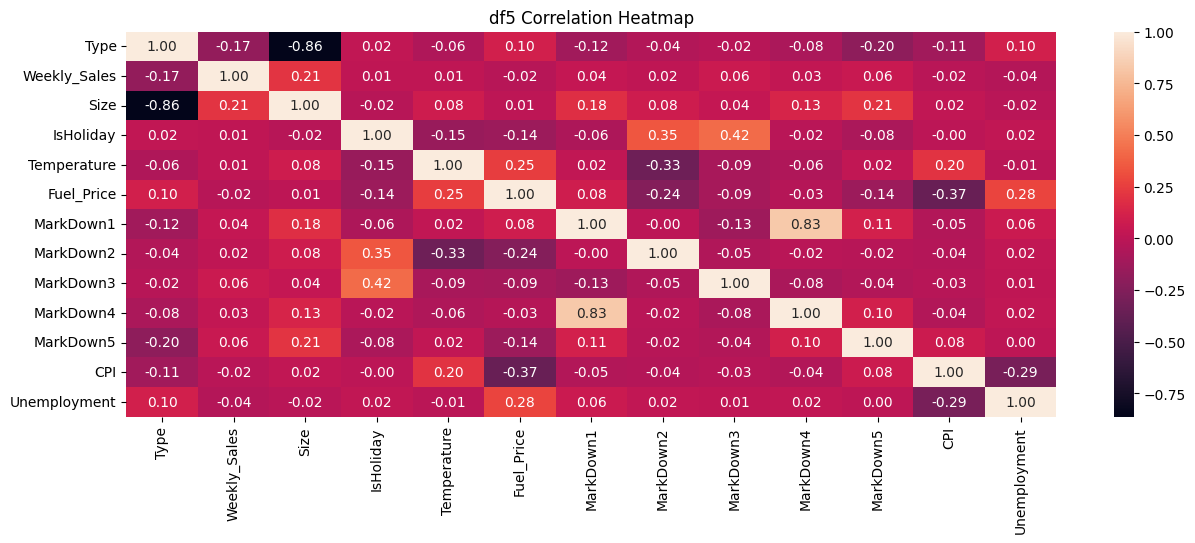

In [52]:
# Calculate the correlation matrix
df5_corr = df5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df5_corr, annot=True, fmt=".2f")
plt.title("df5 Correlation Heatmap")
plt.show()

In [53]:
# in heatmap shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
# other features are weak correlation with weekly_sales.

In [54]:
# make unique column of the dataframe - 'diff'

df5['diff'] = df5['Day'].astype(str)+df5['Month'].astype(str)+df5['Year'].astype(str)+'-'+df5['Store'].astype(str)+'-'+df5['Dept'].astype(str)
df5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-98


In [55]:
# MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 - features have huge number of null values compare to other features

# so need create 2 different models to predict weekly_sales and compare the performance of both model
# model 1 --> with all MarkDowns(1-5) to predict weekly_sales
# model 2 --> without MarkDowns(1-5) to predict weekly_sales

In [56]:
# check number of unique values in each features
df5.nunique()

,0
Day,31
Month,12
Year,4
Store,45
Dept,81
Type,3
Weekly_Sales,358785
Size,40
IsHoliday,2
Temperature,4178


# **Method 1 - with Markdown**

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [58]:
# steps:
# make new dataframe for only not-null value columns
# train Machine learning model and predict 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5' all are separately
# now add all MarkDown(1-5) values into dataframe based on 'diff' column
# repeat and predict 'cpi'
# repeat and predict 'unemplyment'
# finally repeat and predict 'weekly_sales'

In [ ]:
# find Training and Testing accuracy of algorithm

def algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, algorithm):

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy = {'algorithm': algorithm.__name__,
                'R2_train' : r2_train,
                'R2_test'  : r2_test}

    return accuracy

In [60]:
# check different algorithms and predict null values using best algorithm (Random Forest performs well compare to others)

def ml_regression(df, null_features, label):

    # only label column with null values and drop the other null columns from df
    df = df.drop(columns=null_features)

    # filter null values into separate dataframe and reset index order
    df_null = df[df[label].isnull()]
    df_null.reset_index(drop=True, inplace=True)

    # also filter non-null values into separate dataframe and reset index order
    df_notnull = df[df[label].notnull()]
    df_notnull.reset_index(drop=True, inplace=True)

    # make vector(x) and label(y) variables
    x = df_notnull.drop(columns=[label, 'diff'], axis=1)
    y = df_notnull[label]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    # calculate Training and Testing accuracy of different algorithms and evaluate model performance using metrics
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, DecisionTreeRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, ExtraTreesRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, RandomForestRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, AdaBoostRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, GradientBoostingRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, XGBRegressor))

    # Random Forest algorithm performs well to predict unseen data
    model = RandomForestRegressor().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # evaluate model performance using metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'R2': r2,
              'Mean Absolute Error': mae,
              'Mean Squared Error': mse,
              'Root Mean Squared Error': rmse}
    print(metrics)

    # predict null values using model
    y_pred = model.predict(df_null.drop(columns=[label, 'diff'], axis=1))

    # make dataframe of predicted label value and merge with non-null values
    df_null[label] = pd.DataFrame(y_pred)
    df_final = pd.concat([df_null,df_notnull], axis=0, ignore_index=True)
    return df_final

In [61]:
# drop the 'markdown' column and copy to new variable

df_m1 = df5.copy()
df_m1.drop(columns=['markdown'],inplace=True)
df_m1.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-98


In [62]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown1'

df_markdown1 = ml_regression(df_m1, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1')
df_markdown1

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999433898552}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.19487755933241757, 'R2_test': 0.21597887036247743}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7328854690525646, 'R2_test': 0.7356472560550742}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9829894411143196, 'R2_test': 0.9827814393570967}
{'R2': 0.9999999440011388, 'Mean Absolute Error': 0.05001770475771845, 'Mean Squared Error': 5.103878845522707, 'Root Mean Squared Error': np.float64(2.259176585732666)}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,6081.5054,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,6081.5054,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,6081.5054,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,6081.5054,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,6081.5054,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,212.0200,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,212.0200,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,212.0200,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,212.0200,2672013-45-97


In [63]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown2'

df_markdown2 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown2')
df_markdown2

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999698536138}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.4385318803840994, 'R2_test': 0.42428816613947073}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8583236575119891, 'R2_test': 0.8531673429046565}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9987127784289968, 'R2_test': 0.9986624033622861}
{'R2': 0.9999999999992707, 'Mean Absolute Error': 5.215007615554838e-05, 'Mean Squared Error': 5.654110822510799e-05, 'Root Mean Squared Error': np.float64(0.007519382170438472)}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown2,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,6840.7178,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,6840.7178,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,6840.7178,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,6840.7178,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,6840.7178,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,851.7300,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,851.7300,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,851.7300,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,851.7300,2672013-45-97


In [64]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown3'

df_markdown3 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown3')
df_markdown3

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999898070039}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999999996538, 'R2_test': 0.9999999999990451}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.9016315801591009, 'R2_test': 0.9038571622794909}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9247814346124927, 'R2_test': 0.9249349111959401}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999600978893889, 'R2_test': 0.9999594604436224}
{'R2': 0.999999999990447, 'Mean Absolute Error': 0.0009726690777639853, 'Mean Squared Error': 0.0013192378454166308, 'Root Mean Squared Error': np.float64(0.036321313927453545)}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown3,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,143.8348,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,143.8348,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,143.8348,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,143.8348,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,143.8348,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,2.0600,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,2.0600,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,2.0600,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,2.0600,2672013-45-97


In [65]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown4'

df_markdown4 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown5','CPI','Unemployment'], 'MarkDown4')
df_markdown4

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999972165082}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999999993344, 'R2_test': 0.999999999993629}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5777732848333619, 'R2_test': 0.5818527905128854}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7897004104645764, 'R2_test': 0.7947015822917545}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9921265472567694, 'R2_test': 0.9920267462123961}
{'R2': 0.9999999999347773, 'Mean Absolute Error': 0.0011909370642353783, 'Mean Squared Error': 0.003195030488437257, 'Root Mean Squared Error': np.float64(0.056524600736646134)}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown4,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,15517.5864,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,15517.5864,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,15517.5864,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,15517.5864,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,15517.5864,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,10.8800,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,10.8800,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,10.8800,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,10.8800,2672013-45-97


In [66]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown5'

df_markdown5 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'], 'MarkDown5')
df_markdown5

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999987601852}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7133317553410388, 'R2_test': 0.7583082754124533}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.85538462388852, 'R2_test': 0.8658268189876881}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9967966861692091, 'R2_test': 0.9972315628762662}
{'R2': 1.0, 'Mean Absolute Error': 4.862273022181909e-12, 'Mean Squared Error': 7.182026846493076e-23, 'Root Mean Squared Error': np.float64(8.474683974339736e-12)}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown5,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,4757.3745,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,4757.3745,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,4757.3745,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,4757.3745,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,4757.3745,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,1864.5700,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,1864.5700,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,1864.5700,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,1864.5700,2672013-45-97


In [67]:
df_m1

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,diff
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-1
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-2
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-3
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-4
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-97


In [68]:
# remove all old MarkDown(1-5) columns from df_m1

df_m1 = df_m1.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)
df_m1.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-98


In [69]:
# now merge all new predicted 'MarkDown(1-5)' columns --> one by one with df_m1 dataframe --> based on 'diff' column

df_m1 = pd.merge(df_m1, df_markdown1[['MarkDown1', 'diff']], on='diff', how='inner')
df_m1 = pd.merge(df_m1, df_markdown2[['MarkDown2', 'diff']], on='diff', how='inner')
df_m1 = pd.merge(df_m1, df_markdown3[['MarkDown3', 'diff']], on='diff', how='inner')
df_m1 = pd.merge(df_m1, df_markdown4[['MarkDown4', 'diff']], on='diff', how='inner')
df_m1 = pd.merge(df_m1, df_markdown5[['MarkDown5', 'diff']], on='diff', how='inner')
df_m1

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,211.096358,8.106,522010-1-1,6081.5054,6840.7178,143.8348,15517.5864,4757.3745
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,211.096358,8.106,522010-1-2,6081.5054,6840.7178,143.8348,15517.5864,4757.3745
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,211.096358,8.106,522010-1-3,6081.5054,6840.7178,143.8348,15517.5864,4757.3745
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,211.096358,8.106,522010-1-4,6081.5054,6840.7178,143.8348,15517.5864,4757.3745
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,211.096358,8.106,522010-1-5,6081.5054,6840.7178,143.8348,15517.5864,4757.3745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94,212.0200,851.7300,2.0600,10.8800,1864.5700
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95,212.0200,851.7300,2.0600,10.8800,1864.5700
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96,212.0200,851.7300,2.0600,10.8800,1864.5700
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97,212.0200,851.7300,2.0600,10.8800,1864.5700


In [70]:
# next train Machine learning model with df_m1 --> to predict 'CPI'

df_cpi = ml_regression(df_m1, ['Weekly_Sales','Unemployment'], 'CPI')
df_cpi

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 1.0}


KeyboardInterrupt: 

In [ ]:
# drop old 'CPI' column and merge the new predicted 'CPI' columns with df_m1 --> based on 'diff' column

df_m1 = df_m1.drop(columns=['CPI'], axis=1)
df_m1 = pd.merge(df_m1, df_cpi[['CPI', 'diff']], on='diff', how='inner')
df_m1.tail()

In [ ]:
# next train Machine learning model with df_m1 --> to predict 'Unemployment'

df_unemployment = ml_regression(df_m1, ['Weekly_Sales'], 'Unemployment')
df_unemployment

In [ ]:
# drop old 'Unemployment' column and merge the new predicted 'Unemployment' columns with df_m1 --> based on 'diff' column

df_m1 = df_m1.drop(columns=['Unemployment'], axis=1)
df_m1 = pd.merge(df_m1, df_unemployment[['Unemployment', 'diff']], on='diff', how='inner')
df_m1.tail()

In [ ]:
# finally train Machine learning model with df_m1 --> to predict 'Weekly_Sales'

df_weekly_sales = ml_regression(df_m1, [], 'Weekly_Sales')
df_weekly_sales

In [ ]:
df_m1_weekly_sales = df_weekly_sales.copy()
df_m1_weekly_sales.describe().T

In [ ]:
# Calculate the correlation matrix
df_m1_corr = df_m1_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df_m1_corr, annot=True, fmt=".2f")
plt.title("df_m1 Correlation Heatmap")
plt.show()

In [ ]:
# This heatmap also shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
# other features are weak correlation with weekly_sales.

In [ ]:
# filter null values into separate dataframe and reset index order
df_null = df_m1[df_m1['Weekly_Sales'].isnull()]
df_null.reset_index(drop=True, inplace=True)

# also filter non-null values into separate dataframe and reset index order
df_notnull = df_m1[df_m1['Weekly_Sales'].notnull()]
df_notnull.reset_index(drop=True, inplace=True)

# make vector(x) and label(y) variables
x = df_notnull.drop(columns=['Weekly_Sales', 'diff'], axis=1)
y = df_notnull['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Random Forest algorithm performs well to predict unseen data
model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluate model performance using metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

print(metrics)

In [ ]:
import pickle

# save the model to pickle
with open("model1_markdown.pkl", 'wb') as f:
    pickle.dump(model, f)

# **Method 2 - w/o Markdown**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# steps:
# make new dataframe for only not-null value columns
# train Machine learning model and 'cpi'
# repeat and predict 'unemplyment'
# finally repeat and predict 'weekly_sales'

In [ ]:
# find Training and Testing accuracy of algorithm

def algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, algorithm):

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy = {'algorithm': algorithm.__name__,
                'R2_train' : r2_train,
                'R2_test'  : r2_test}

    return accuracy


In [ ]:
# check different algorithms and predict null values using best algorithm (Random Forest performs well compare to others)

def ml_regression(df, null_features, label):

    # only label column with null values and drop the other null columns from df
    df = df.drop(columns=null_features)

    # filter null values into separate dataframe and reset index order
    df_null = df[df[label].isnull()]
    df_null.reset_index(drop=True, inplace=True)

    # also filter non-null values into separate dataframe and reset index order
    df_notnull = df[df[label].notnull()]
    df_notnull.reset_index(drop=True, inplace=True)

    # make vector(x) and label(y) variables
    x = df_notnull.drop(columns=[label, 'diff'], axis=1)
    y = df_notnull[label]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    # calculate Training and Testing accuracy of different algorithms and evaluate model performance using metrics
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, DecisionTreeRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, ExtraTreesRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, RandomForestRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, AdaBoostRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, GradientBoostingRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, XGBRegressor))

    # Random Forest algorithm performs well to predict unseen data
    model = RandomForestRegressor().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # evaluate model performance using metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'R2': r2,
              'Mean Absolute Error': mae,
              'Mean Squared Error': mse,
              'Root Mean Squared Error': rmse}
    print(metrics)

    # predict null values using model
    y_pred = model.predict(df_null.drop(columns=[label, 'diff'], axis=1))

    # make dataframe of predicted label value and merge with non-null values
    df_null[label] = pd.DataFrame(y_pred)
    df_final = pd.concat([df_null,df_notnull], axis=0, ignore_index=True)
    return df_final


In [ ]:
# drop all MarkDown(1-5) columns
df_m2 = df5.copy()
df_m2.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','markdown'],inplace=True)
df_m2.tail()

In [ ]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'CPI'

df_m2_cpi = ml_regression(df_m2, ['Weekly_Sales','Unemployment'], 'CPI')
df_m2_cpi

In [ ]:
# drop old 'CPI' column and merge the new predicted 'CPI' columns with df_m2 --> based on 'diff' column

df_m2 = df_m2.drop(columns=['CPI'], axis=1)
df_m2 = pd.merge(df_m2, df_m2_cpi[['CPI', 'diff']], on='diff', how='inner')
df_m2.tail()

In [ ]:
# next train Machine learning model with df_m1 --> to predict 'Unemployment'

df_m2_unemployment = ml_regression(df_m2, ['Weekly_Sales'], 'Unemployment')
df_m2_unemployment

In [ ]:
# drop old 'Unemployment' column and merge the new predicted 'Unemployment' columns with df_m1 --> based on 'diff' column

df_m2 = df_m2.drop(columns=['Unemployment'], axis=1)
df_m2 = pd.merge(df_m2, df_m2_unemployment[['Unemployment', 'diff']], on='diff', how='inner')
df_m2.tail()

In [ ]:
# finally train Machine learning model with df_m1 --> to predict 'Weekly_Sales'

df_m2_weekly_sales = ml_regression(df_m2, [], 'Weekly_Sales')
df_m2_weekly_sales

In [ ]:
df_m2_weekly_sales.describe().T

In [ ]:
# Calculate the correlation matrix
df_m2_corr = df_m2_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr()

# Create a heatmap
plt.figure(figsize=(10, 4))  # Adjust the figure size if needed
sns.heatmap(df_m2_corr, annot=True, fmt=".2f")
plt.title("df_m2 Correlation Heatmap")
plt.show()

In [ ]:
# This heatmap also shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
# other features are weak correlation with weekly_sales.

In [ ]:
# filter null values into separate dataframe and reset index order
df_null = df_m2[df_m2['Weekly_Sales'].isnull()]
df_null.reset_index(drop=True, inplace=True)

# also filter non-null values into separate dataframe and reset index order
df_notnull = df_m2[df_m2['Weekly_Sales'].notnull()]
df_notnull.reset_index(drop=True, inplace=True)

# make vector(x) and label(y) variables
x = df_notnull.drop(columns=['Weekly_Sales', 'diff'], axis=1)
y = df_notnull['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Random Forest algorithm performs well to predict unseen data
model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}
print(metrics)

In [ ]:
import pickle

# save the model to pickle
with open(r"model\model2.pkl", 'wb') as f:
    pickle.dump(model, f)

# **final**

In [ ]:
# df_m1

{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9962977059898378, 'R2_test': 0.9742634686561732}

{'R2': 0.9737178130306225, 'MAE': 1434.254303695727, 'MSE': 13323649.668453334, 'RMSE': 3650.157485431736}

In [ ]:
# df_m2

{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9967069973143954, 'R2_test': 0.9765555649166456}

{'R2': 0.9774999505349639, 'MAE': 1356.8024090382305, 'MSE': 11406310.172905441, 'RMSE': 3377.3229299114173}

In [ ]:
df5.describe()

In [ ]:
df_m1_weekly_sales.describe()

In [ ]:
df_m1_weekly_sales.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']).describe()

In [ ]:
df_m2_weekly_sales.describe()

In [ ]:
df5_corr = df5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr()
plt.figure(figsize=(15, 5))
sns.heatmap(df5_corr, annot=True, fmt=".2f")
plt.title("df5 Correlation Heatmap")
plt.show()

In [ ]:
df_m1_corr = df_m1_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr()
plt.figure(figsize=(15, 5))
sns.heatmap(df_m1_corr, annot=True, fmt=".2f")
plt.title("df_m1 Correlation Heatmap")
plt.show()

In [ ]:
df_m2_corr = df_m2_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr()
plt.figure(figsize=(10, 4))
sns.heatmap(df_m2_corr, annot=True, fmt=".2f")
plt.title("df_m2 Correlation Heatmap")
plt.show()

In [ ]:
with open(r"model\model1_markdown.pkl", 'rb') as f1:
    pred_model = pickle.load(f1)

y_pred1 = pred_model.predict(np.array([[5,2,2010,1,1,1,151315,0,42.31,2.6,7046.9,6618.9,166.9,16055.8,4671.9,211.1,8.1]]))
y_pred1[0]

In [ ]:
with open(r"model\model2.pkl", 'rb') as f1:
    pred_model = pickle.load(f1)

y_pred1 = pred_model.predict(np.array([[5,2,2010,1,1,1,151315,0,42.31,2.6,211.1,8.1]]))
y_pred1[0]

In [ ]:
df_sql = pd.read_csv("/content/drive/MyDrive/Amaan-Retail Project/DataSets/df_sql.csv")
df_sql.head(2)